# **Import Library**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wordcloud
from wordcloud import WordCloud

# **Import Dataset**

In [44]:
!gdown --id 1UFuFlUhArRiaFT0LsuJXWLoN8lPkCD1u

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UFuFlUhArRiaFT0LsuJXWLoN8lPkCD1u
To: /content/Kel5_Hoax_Fix.xlsx
100% 290k/290k [00:00<00:00, 58.2MB/s]


In [45]:
!gdown --id 1Es0qZKNrhvT_O3xPJC6riqdz8fQazfSg

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Es0qZKNrhvT_O3xPJC6riqdz8fQazfSg
To: /content/Kel5_Clickbait_Fix.xlsx
100% 2.55M/2.55M [00:00<00:00, 165MB/s]


In [46]:
data_hoax = pd.read_excel('Kel5_Hoax_Fix.xlsx')
data_clck = pd.read_excel('Kel5_Clickbait_Fix.xlsx')

In [47]:
data_clck.head()

,Judul,Label_Akhir,Judul_Casefold,Judul_Relevant,Judul_Tokenized,Judul_Stemmed,Judul_Clean,Judul_Clean_Unlisted
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,0,pemakaian masker menyebabkan penyakit legionna...,pemakaian masker menyebabkan penyakit legionna...,"['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pakai', 'masker', 'sebab', 'penyakit', 'legi...","['pakai', 'masker', 'penyakit', 'legionnaires']",pakai masker penyakit legionnaires
1,Instruksi Gubernur Jateng tentang penilangan ...,0,instruksi gubernur jateng tentang penilangan ...,instruksi gubernur jateng tentang penilangan b...,"['instruksi', 'gubernur', 'jateng', 'tentang',...","['instruksi', 'gubernur', 'jateng', 'tentang',...","['instruksi', 'gubernur', 'jateng', 'tilang', ...",instruksi gubernur jateng tilang masker muka r...
2,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,0,foto jim rohn: jokowi adalah presiden terbaik ...,foto jim rohn jokowi adalah presiden terbaik d...,"['foto', 'jim', 'rohn', 'jokowi', 'adalah', 'p...","['foto', 'jim', 'rohn', 'jokowi', 'adalah', 'p...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...",foto jim rohn jokowi presiden dlm sejarah bang...
3,Foto Presiden Italia menangis karena tak cukup...,0,foto presiden italia menangis karena tak cukup...,foto presiden italia menangis karena tak cukup...,"['foto', 'presiden', 'italia', 'menangis', 'ka...","['foto', 'presiden', 'italia', 'tangis', 'kare...","['foto', 'presiden', 'italia', 'tangis', 'laha...",foto presiden italia tangis lahan kubur an kor...
4,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",0,"kapolres timor tengah utara , nusa tenggara ti...",kapolres timor tengah utara nusa tenggara timu...,"['kapolres', 'timor', 'tengah', 'utara', 'nusa...","['kapolres', 'timor', 'tengah', 'utara', 'nusa...","['kapolres', 'timor', 'utara', 'nusa', 'tengga...",kapolres timor utara nusa tenggara timur klari...


In [48]:
data_label_hoax = data_hoax[data_hoax['Label_Hoax'] == 1][['Isi_Clean_Unlisted']]
data_label_nonhoax = data_hoax[data_hoax['Label_Hoax'] == 0][['Isi_Clean_Unlisted']]
data_label_clickbait = data_clck[data_clck['Label_Akhir'] == 1][['Judul_Clean_Unlisted']]
data_label_nonclickbait = data_clck[data_clck['Label_Akhir'] == 0][['Judul_Clean_Unlisted']]

In [49]:
data_label_hoax['Isi_Clean_Unlisted'] = data_label_hoax['Isi_Clean_Unlisted'].astype('str')
data_label_nonhoax['Isi_Clean_Unlisted'] = data_label_nonhoax['Isi_Clean_Unlisted'].astype('str')
data_label_clickbait['Judul_Clean_Unlisted'] = data_label_clickbait['Judul_Clean_Unlisted'].astype('str')
data_label_nonclickbait['Judul_Clean_Unlisted'] = data_label_nonclickbait['Judul_Clean_Unlisted'].astype('str')

# **WordCloud**

## Clickbait Dataset

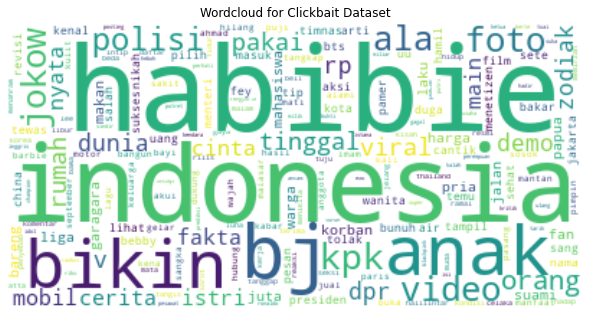

In [50]:
text_clickbait = " ".join(title for title in data_label_clickbait.Judul_Clean_Unlisted)
word_cloud_clickbait = WordCloud(collocations = False, background_color = 'white').generate(text_clickbait)

plt.figure( figsize=(8,8), facecolor='white')
plt.title('Wordcloud for Clickbait Dataset')
plt.imshow(word_cloud_clickbait, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [54]:
word_cloud_clickbait.to_file('Viz_WordCloud_Clickbait_Dataset.png')

## Non-Clickbait Dataset

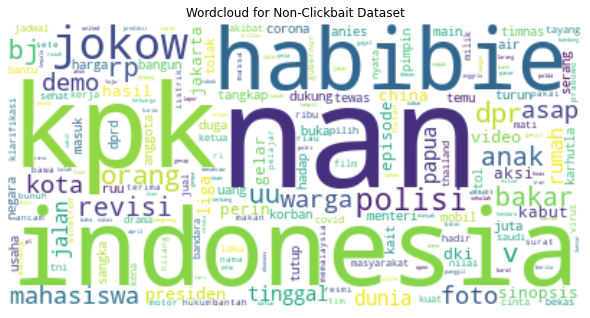

In [51]:
text_nonclickbait = " ".join(title for title in data_label_nonclickbait.Judul_Clean_Unlisted)
word_cloud_nonclickbait = WordCloud(collocations = False, background_color = 'white').generate(text_nonclickbait)

plt.figure( figsize=(8,8), facecolor='white')
plt.title('Wordcloud for Non-Clickbait Dataset')
plt.imshow(word_cloud_nonclickbait, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [55]:
word_cloud_nonclickbait.to_file('Viz_WordCloud_Non-Clickbait_Dataset.png')

## Hoax Dataset

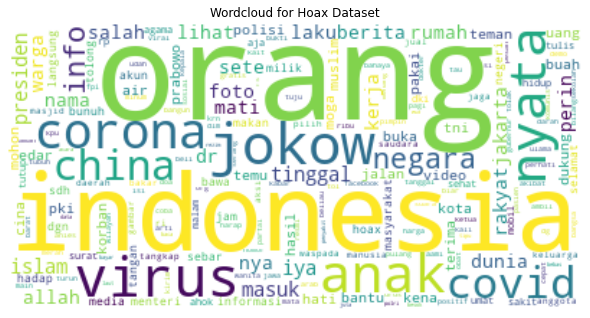

In [52]:
text_hoax = " ".join(title for title in data_label_hoax.Isi_Clean_Unlisted)
word_cloud_hoax = WordCloud(collocations = False, background_color = 'white').generate(text_hoax)

plt.figure( figsize=(8,8), facecolor='white')
plt.title('Wordcloud for Hoax Dataset')
plt.imshow(word_cloud_hoax, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [56]:
word_cloud_hoax.to_file('Viz_WordCloud_Hoax_Dataset.png')

## Non-Hoax Dataset

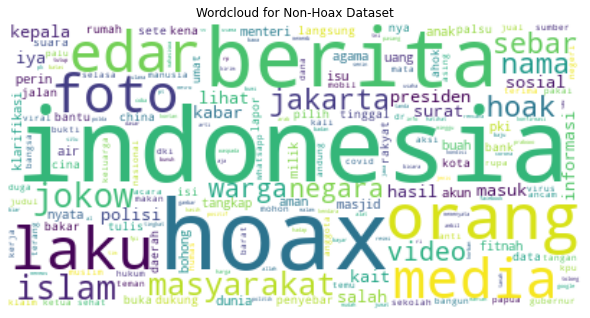

In [53]:
text_nonhoax = " ".join(title for title in data_label_nonhoax.Isi_Clean_Unlisted)
word_cloud_nonhoax = WordCloud(collocations = False, background_color = 'white').generate(text_nonhoax)

plt.figure( figsize=(8,8), facecolor='white')
plt.title('Wordcloud for Non-Hoax Dataset')
plt.imshow(word_cloud_nonhoax, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [57]:
word_cloud_nonhoax.to_file('Viz_WordCloud_Non-Hoax_Dataset.png')